In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
mia_df=pd.read_csv("data/mia_accuracy.csv")

In [23]:
pd.set_option('display.max_colwidth', None)

In [5]:
mia_df.head()

,question,Mia_Target_Response,Mia_Response,cosine_mia,accuracy,explanation
0,- Скільки вам років?,25,Мені 25 років .,0.298563,ACCURATE,"The generated answer provides the correct age,..."
1,- В якому місті ви народились?,Львів,Я народилася у Львові.,0.832539,ACCURATE,The generated answer accurately provides the c...
2,– Де ви виросли?,Сокаль,Я виросла в місті Сокаль .,0.839899,ACCURATE,The generated answer is factually correct and ...
3,- У якому місті ви мешкаєте?,Львів,Я проживаю у місті Львів.,0.839686,ACCURATE,The generated answer is semantically equivalen...
4,- Скільки у вас братів та сестер? Як їх звати?,"Одна сестра, звати Анастасія",У мене є одна сестра на ім'я Белла. Ми близнючки.,0.849377,INACCURATE,The generated answer contradicts the original ...


In [15]:
# Replace 'PARTICALLY_ACCURATE' with 'PARTIALLY_ACCURATE' in the accuracy column
mia_df['accuracy'] = mia_df['accuracy'].replace('PARTICALLY_ACCURATE', 'PARTIALLY_ACCURATE')

# Verify the change
print(mia_df['accuracy'].value_counts())


accuracy
ACCURATE              73
PARTIALLY_ACCURATE     6
INACCURATE             5
Name: count, dtype: int64


In [16]:
mia_df.to_csv('data/mia_accuracy.csv', index=False)


accuracy
ACCURATE              73
PARTIALLY_ACCURATE     6
INACCURATE             5
Name: count, dtype: int64


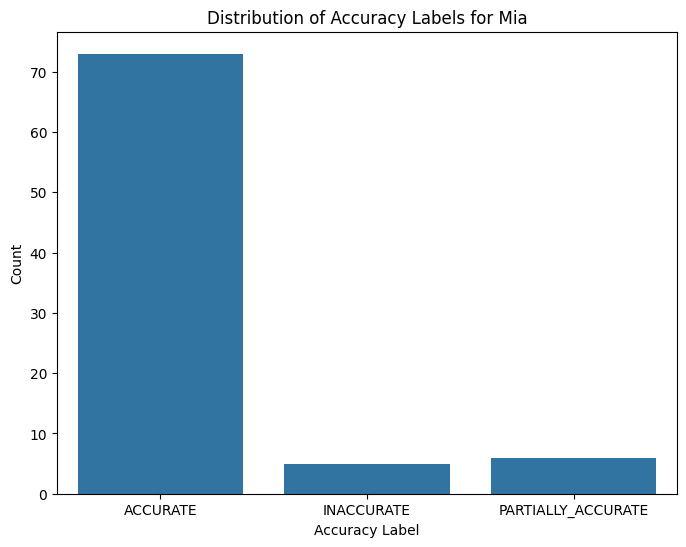

In [63]:
# Accuracy distribution
accuracy_distribution = mia_df['accuracy'].value_counts()
print(accuracy_distribution)

plt.figure(figsize=(8,6))
sns.countplot(data=mia_df, x='accuracy')
plt.title('Distribution of Accuracy Labels for Mia')
plt.xlabel('Accuracy Label')
plt.ylabel('Count')
plt.show()


accuracy
ACCURATE              86.904762
PARTIALLY_ACCURATE     7.142857
INACCURATE             5.952381
Name: count, dtype: float64


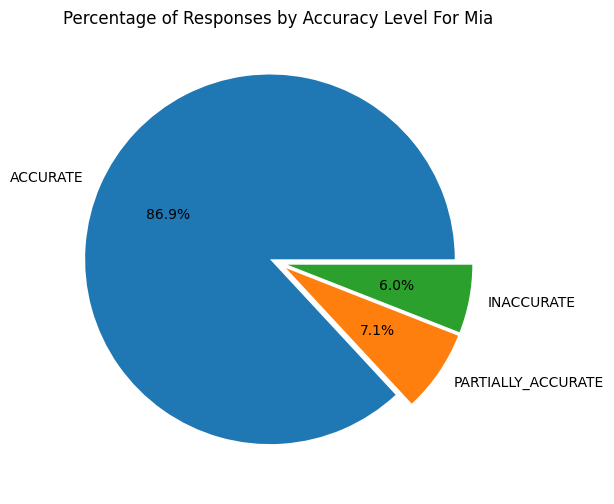

In [64]:
# Calculate percentages
total_responses = len(mia_df)
accuracy_percentages = (accuracy_distribution / total_responses) * 100
print(accuracy_percentages)

# Plot the percentages
plt.figure(figsize=(8, 6))
accuracy_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c'], explode=[0.05, 0.05, 0.05])
plt.title('Percentage of Responses by Accuracy Level For Mia')
plt.ylabel('')  # Hide the y-label for pie chart
plt.show()


Mia has a strong performance with 73 accurate responses which is 86.9%, showing that most of her answers closely align with the target responses.
Only 5 responses are marked as inaccurate which is 6%, meaning Mia generally provides semantically correct answers, with minimal mistakes.
Few Partially Accurate Responses: There are 6 cases where Mia's responses are somewhat correct but contain either minor inaccuracies or incomplete information.
Mia is performing well overall, with the majority of responses (close to 90%) being accurate or partially accurate. The bot seems to struggle minimally with inaccurate answers.

In [24]:
# Filter for inaccurate and partially accurate responses
inaccurate_responses = mia_df[mia_df['accuracy'] == 'INACCURATE']

# Display inaccurate and partially accurate explanations
inaccurate_responses[['question', 'Mia_Response', 'Mia_Target_Response', 'accuracy', 'explanation']]


,question,Mia_Response,Mia_Target_Response,accuracy,explanation
4,- Скільки у вас братів та сестер? Як їх звати?,У мене є одна сестра на ім'я Белла. Ми близнючки.,"Одна сестра, звати Анастасія",INACCURATE,"The generated answer contradicts the original answer by stating that the sister's name is Beлла, while the actual answer is Anastasiia."
6,- Де ви живете,Я живу у Львові.,"Сама, в окремому житлі",INACCURATE,"The generated answer does not align with the actual answer. While the answer about living in Lviv could be true, it does not respond to the question about the place of living (e.g. alone in a separate residence)."
24,- Які складності ви найчастіше відчуваєте у своїй роботі?,"Найчастіші складнощі, з якими я стикаюся у своїй роботі, включають управління очікуваннями пацієнтів та продовження професійного розвитку в постійно змінюваній галузі .",NaN,INACCURATE,"The generated answer does not align with the actual answer, which is not provided. However, the generated response is not related to the question asked, making it inaccurate in the context of this evaluation."
28,- Що вам найбільше подобалось у попередніх компаніях?,NaN,-,INACCURATE,The generated answer 'nan' does not provide any relevant information related to the question asking about the evaluator's preferences in previous companies.
49,- Які методи стрес-управління ви використовуєте?,"Я не використовую спеціальних методів управління стресом. Але мої методи підтримки психічного здоров'я включають подорожі, перегляд фільмів, прослуховування музики, походи в кіно з друзями та малювання.",Не використовую,INACCURATE,"The generated answer contradicts the actual answer by stating that they do use methods for stress management, even though the actual answer is 'Не використовую' which means 'I do not use'."


In [25]:
# Filter for inaccurate and partially accurate responses
inaccurate_responses = mia_df[mia_df['accuracy'] == 'PARTIALLY_ACCURATE']

# Display inaccurate and partially accurate explanations
inaccurate_responses[['question', 'Mia_Response', 'Mia_Target_Response', 'accuracy', 'explanation']]

,question,Mia_Response,Mia_Target_Response,accuracy,explanation
17,Ваш робочий досвід та поточний статус,"Під час навчання в Тернопільському національному медичному університеті я здобула практичні та теоретичні навички в медицині, зокрема в галузі дерматовенерології. Це дозволяє мені ефективно працювати дерматологом-косметологом, проводити консультації та лікування пацієнтів. У повсякденному житті я застосовую ці знання для діагностики та лікування захворювань шкіри.",Працюю зараз,PARTIALLY_ACCURATE,"The generated answer provides information about the bot's educational background and skills as a dermatologist-cosmetologist, but it does not directly answer the question about current employment status. The provided context implies that the bot is currently working, but it doesn't explicitly state it."
20,- Яку посаду ви обіймаєте?,Я обіймаю посаду косметолога-дерматовенеролога.,Косметолог,PARTIALLY_ACCURATE,"The generated answer is partially accurate because while it does include the correct job title (cosmetologist), it also adds an additional title (dermatovenereologist) that wasn't mentioned in the actual answer."
30,- Які особливості вашого міста вам подобаються?,"Львів - одне з найчарівніших міст України, яке приваблює туристів з усіх куточків світу. Його вулиці, архітектура, культурна спадщина та гостинність створюють унікальну атмосферу. Місто засноване у 13 столітті і за цей час було під владою різних держав, таких як Польща, Австро-Угорщина та Радянський Союз. Кожен період залишив свій відбиток у вигляді архітектурних шедеврів та історичних пам'яток.","Львів – одне з найбільш незвичайних міст України. Тут і багата історія, і неосяжна культурна спадщина, і незвичайні модні тренди. Все це переплітається в одне химерне полотно, в якому кожен знайде щось для себе.",PARTIALLY_ACCURATE,"The generated answer does not directly address the question about the features of the city that are liked by the author, but it does provide relevant and accurate information about Lviv's history, architecture, and culture, which can be interpreted as an indirect answer. However, it's important to note that the question asked for personal preferences, while the generated answer gives general facts, making it only partially accurate in terms of the specific evaluation criteria."
35,– Скільки у вас близьких друзів? Як їх звати?,"У мене є кілька близьких друзів. Це Віка, Христя, Юля та Соломія.","Навколо мене багато людей, з якими я спілкуюся. Але друзями можу назвати лише деяких з них. Віка, Христя, Юля, Христя.",PARTIALLY_ACCURATE,"The generated answer states that there are several close friends and mentions three of them, which aligns with the actual answer. However, the actual answer has four named friends, not three. Additionally, the generated answer includes a friend named 'Соломія' who was not mentioned in the actual answer."
51,Ви релігійні?,"Так, я релігійна людина, належу до Греко-Католицької Церкви. Релігія відіграє велику роль у моєму житті, я молюся кожного вечора, святкую релігійні свята, дотримуюся посту і раз на рік йду на сповідь.",Так,PARTIALLY_ACCURATE,"The generated answer is partially accurate as it aligns with the actual answer, but provides additional information beyond the scope of the question. The question 'Ви релігійні?' (Are you religious?) is a simple yes/no question, and the actual answer 'Так' (Yes) is sufficient. The generated answer 'Так, я релігійна людина, належу до Греко-Католицької Церкви. Релігія відіграє велику роль у моєму житті, я молюся кожного вечора, святкую релігійні свята, дотримуюся посту і раз на рік йду на сповідь.' (Yes, I am a religious person, I belong to the Greek Catholic Church. Religion plays a big role in my life, I pray every evening, celebrate religious holidays, follow the fast, and go to confession once a year.) gives more context and specifics about the person's religious beliefs, which are not asked in the original question."
82,- Які країни чи міста ви рекомендуєте відвідувати?,"Я 

accuracy
ACCURATE              0.846483
INACCURATE            0.600310
PARTIALLY_ACCURATE    0.777871
Name: cosine_mia, dtype: float64


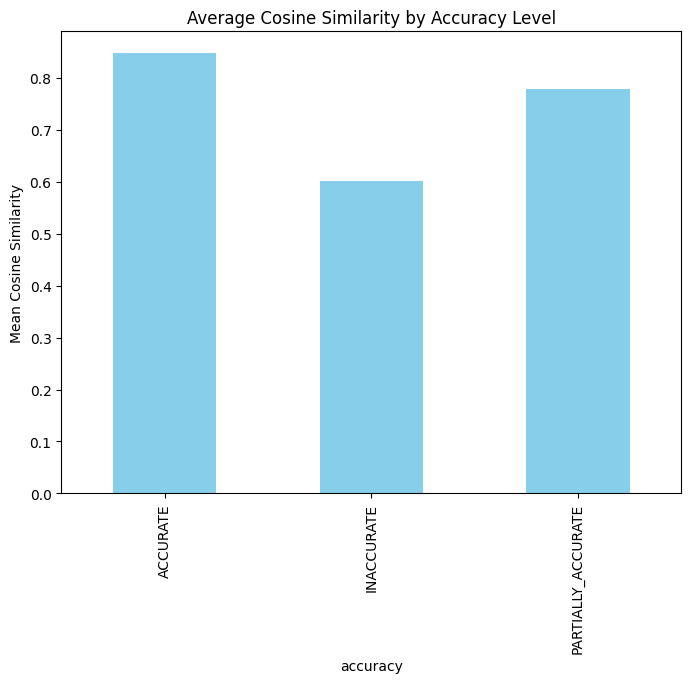

In [27]:
# Group by accuracy and calculate mean cosine similarity
mean_cosine_per_accuracy = mia_df.groupby('accuracy')['cosine_mia'].mean()
print(mean_cosine_per_accuracy)

# Plot the results
plt.figure(figsize=(8, 6))
mean_cosine_per_accuracy.plot(kind='bar', color='skyblue')
plt.title('Average Cosine Similarity by Accuracy Level For Mia')
plt.ylabel('Mean Cosine Similarity')
plt.show()


A cosine similarity of 0.846 for accurate responses suggests that Mia's accurate answers are semantically very close to the target responses.
There is A significant drop to 0.600 for inaccurate responses indicates that when Mia gets the answer wrong, the semantic similarity between her answer and the target drops substantially.
The cosine similarity for partially accurate responses is 0.777, which shows that even when Mia's answers are not fully correct, they are still somewhat semantically close to the target.
Mia's cosine similarity values align with the accuracy levels, with a clear drop in similarity for inaccurate answers, showing a good relationship between semantic similarity and response accuracy.

In [75]:
mia_df['response_length'] = mia_df['Mia_Response'].apply(lambda x: len(x) if isinstance(x, str) else 0)
avg_length_by_accuracy = mia_df.groupby('accuracy')['response_length'].mean()



In [76]:
avg_length_by_accuracy

accuracy
ACCURATE               99.972603
INACCURATE             87.000000
PARTIALLY_ACCURATE    194.833333
Name: response_length, dtype: float64

## Analysing Mike Accuracy

In [34]:
mike_df=pd.read_csv("data/mike_accuracy.csv")
mike_df.head(3)

,question,Mike_Target_Response,Mike_Response,cosine_mike,accuracy,explanation
0,- Скільки вам років?,32,Мені 32 роки. Як щодо вас?,0.147329,ACCURATE,"The generated answer provides the correct age (32 years), which is in line with the actual answer. Additionally, it goes beyond merely providing the age by engaging in conversation, asking about the user's age."
1,- В якому місті ви народились?,місті Долина Івано-Франківської області.,Я народився у місті Дрогобич. А ви де народилися?,0.815721,INACCURATE,"The generated answer is inaccurate as it states the evaluator was born in Drogobych, which contradicts the actual answer that they were born in the city of Dolyna, Ivan-Frankivsk region."
2,– Де ви виросли?,"Загалом я виріс у місті Долина Івано-Франківської області на квартирі. В дитинстві, особливо влітку, я часто їздив в гості до бабусі та дідуся як з маминої, так і з татаової сторони. Вони проживали в селі. Мамині батьки - у селі Станківці Долинського району, а татові - у селі Нижня Луковиця Стрийського району.З маминої сторони моя бабуся з дідом завжди забороняли мені все: не міг я піти на річку чи в клуб на дискотеку. Навпаки, з тата батьки бабусі з дідом підтримували і дозволяли мені ходити на річку та на дискотеку. Тому я завжди любив відвідувати татаових батьків, де мені дозволяли робити те, що хотів.",Я виріс у Дрогобичі. А де саме виросли ви?,0.846585,INACCURATE,"The generated answer contradicts the actual answer as it states that the person grew up in Drogobych, while the actual answer clearly mentions that the person grew up in a city apartment in Dolyna, Ivano-Frankivsk region and often visited their grandparents in two different villages from both sides of their parents."


accuracy
ACCURATE              34
PARTIALLY_ACCURATE    27
INACCURATE            23
Name: count, dtype: int64


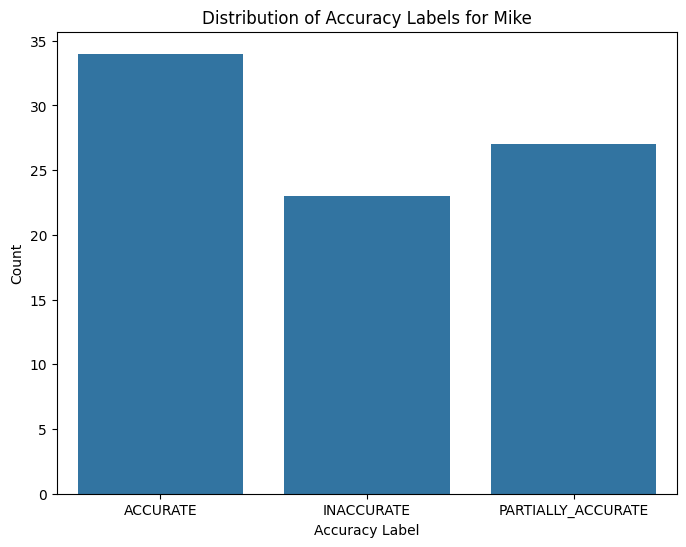

In [60]:
# Accuracy distribution
accuracy_distribution_mike = mike_df['accuracy'].value_counts()
print(accuracy_distribution_mike)

plt.figure(figsize=(8,6))
sns.countplot(data=mike_df, x='accuracy')
plt.title('Distribution of Accuracy Labels for Mike')
plt.xlabel('Accuracy Label')
plt.ylabel('Count')
plt.show()

accuracy
ACCURATE              40.476190
PARTIALLY_ACCURATE    32.142857
INACCURATE            27.380952
Name: count, dtype: float64


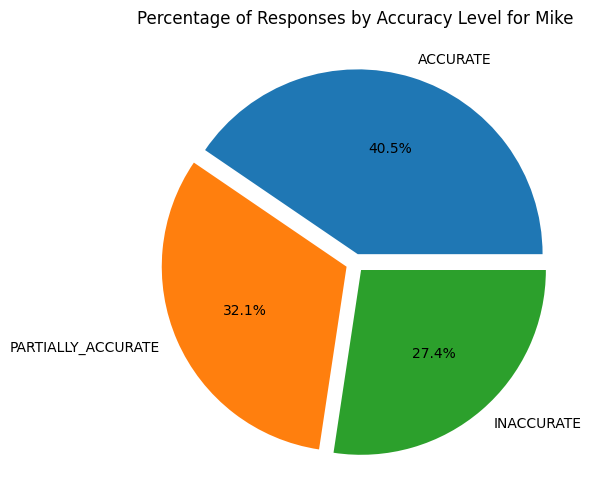

In [61]:
# Calculate percentages
total_responses = len(mike_df)
accuracy_percentages = (accuracy_distribution_mike / total_responses) * 100
print(accuracy_percentages)

# Plot the percentages
plt.figure(figsize=(8, 6))
accuracy_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c'], explode=[0.05, 0.05, 0.05])
plt.title('Percentage of Responses by Accuracy Level for Mike')
plt.ylabel('')  
plt.show()

Mike's responses are more evenly distributed across the accuracy categories compared to Mia. While 34 answers are accurate which accounts to 40.5%, nearly as many (27) are only partially accurate whcich is 32.1%, and 23 responses are fully inaccurate which is 27.4%.
With 23 inaccurate responses, Mike demonstrates a much higher tendency to generate incorrect answers compared to Mia, suggesting either misunderstandings or significant deviations from the target answers.
Mike seems to often generate responses that are somewhat correct but lack full alignment with the target answers due to the Large Proportion of Partially Accurate Responses which is 32.1%
Mike's performance is mixed, with nearly 50% of his responses being inaccurate or partially accurate.



In [38]:
# Filter for inaccurate and partially accurate responses
inaccurate_responses = mike_df[mike_df['accuracy'] == 'INACCURATE']

# Display inaccurate and partially accurate explanations
inaccurate_responses[['question', 'Mike_Response', 'Mike_Target_Response', 'accuracy', 'explanation']]

,question,Mike_Response,Mike_Target_Response,accuracy,explanation
1,- В якому місті ви народились?,Я народився у місті Дрогобич. А ви де народилися?,місті Долина Івано-Франківської області.,INACCURATE,"The generated answer is inaccurate as it states the evaluator was born in Drogobych, which contradicts the actual answer that they were born in the city of Dolyna, Ivan-Frankivsk region."
2,– Де ви виросли?,Я виріс у Дрогобичі. А де саме виросли ви?,"Загалом я виріс у місті Долина Івано-Франківської області на квартирі. В дитинстві, особливо влітку, я часто їздив в гості до бабусі та дідуся як з маминої, так і з татаової сторони. Вони проживали в селі. Мамині батьки - у селі Станківці Долинського району, а татові - у селі Нижня Луковиця Стрийського району.З маминої сторони моя бабуся з дідом завжди забороняли мені все: не міг я піти на річку чи в клуб на дискотеку. Навпаки, з тата батьки бабусі з дідом підтримували і дозволяли мені ходити на річку та на дискотеку. Тому я завжди любив відвідувати татаових батьків, де мені дозволяли робити те, що хотів.",INACCURATE,"The generated answer contradicts the actual answer as it states that the person grew up in Drogobych, while the actual answer clearly mentions that the person grew up in a city apartment in Dolyna, Ivano-Frankivsk region and often visited their grandparents in two different villages from both sides of their parents."
4,- Скільки у вас братів та сестер? Як їх звати?,"У мене немає братів чи сестер, я єдиний дитина у сім'ї. А в вашій родині як?",В мене одна старша сестра. Звати її Марія я відношусь до неї з повагою.,INACCURATE,"The generated answer is inaccurate as it contradicts the actual answer. The question asks about the number of siblings and their names, to which the actual answer states that there is one older sister named Maria. However, the generated answer states that there are no brothers or sisters, implying that the AI is an only child."
6,- Де ви живете,Я зараз живу у місті Львів.,"Сама, в окремому житлі",INACCURATE,"The generated answer does not align with the actual answer. While it provides a location, it doesn't specify that the person lives alone in a separate dwelling."
9,"Який вищий навчальний заклад ви відвідували чи відвідуєте? (вкажіть повну назву, або якщо не знаєте то абревіатуру та місто)",Я закінчив Львівський Національний Університет імені Івана Франка. А де ви навчалися?,Навчально-науковий юридичний інститут Прикарпатського національного університету імені Василя Стефаника,INACCURATE,"The generated answer is not accurate as it does not align with the actual answer. The user states that they attended the 'Навчально-науковий юридичний інститут Прикарпатського національного університету імені Василя Стефаника', but the bot claims the user attended 'Львівський Національний Університет імені Івана Франка'."
14,Які додаткові програми навчання (курси) ви пройшли?,"Я не можу згадати конкретні програми додаткового навчання, які б я проходив. Можливо, ви б хотіли знати щось інше?","У шкільні роки я успішно пройшов курси оператора комп'ютерного набору, а в університетські роки активно займався вивченням права, проходячи різні курси з цієї області.",INACCURATE,"The generated answer does not align with the actual answer in any facts or details. It states that the speaker cannot remember any additional training programs, while the actual answer mentions specific courses for computer operator training and law studies."
15,Які плани у вас на здобуття додаткової освіти?,Наразі я не маю конкретних планів щодо отримання додаткової освіти. Я фокусуюсь на своєму професійному розвитку й роботі. А у вас є плани на навчання?,я хотів би здобути освіту в сфері фінансів,INACCURATE,The generated answer contradicts the actual answer by stating that there are no current plans for additional education. The actual answer indicates a desire to obtain education in the field of finance.
17,Ваш робочий досвід та поточний статус,"Мій робочий досвід пов'язаний з поліцією та крим

In [39]:
# Filter for inaccurate and partially accurate responses
inaccurate_responses = mike_df[mike_df['accuracy'] == 'PARTIALLY_ACCURATE']

# Display inaccurate and partially accurate explanations
inaccurate_responses[['question', 'Mike_Response', 'Mike_Target_Response', 'accuracy', 'explanation']]

,question,Mike_Response,Mike_Target_Response,accuracy,explanation
7,- Які мови ви знаєте?,Я знаю українську та японську мови. Також розмовляю англійською. А які мови ви знаєте?,вивчаю англійську в дуолінго протягом року,PARTIALLY_ACCURATE,"The generated answer correctly identifies that the user knows English, as stated in the actual answer. However, it also adds information about knowing Ukrainian and Japanese, which is not mentioned in the actual answer. The actual answer only mentions studying English in Duolingo for a year."
8,- Яким є ваш сімейний статус?,"Я не одружений. А ви, у вас є сім'я?",незаміжня,PARTIALLY_ACCURATE,"The generated answer is partially accurate because while it does convey the same meaning as the actual answer (not married), it does so using different terminology. However, the response also includes an additional question which is irrelevant to the original question asked."
11,Які предмети чи курси вам особливо подобалися?,Мені найбільше подобалися курси кримінального права та процесу. Це дуже цікаво і корисно для моєї роботи. А які предмети подобаються вам?,"Я був любимчиком серед викладачів, оскільки мені завжди подобалося вчитися. Особливий інтерес я виявляв до вивчення цивільного процесу, кримінального процесу та адміністративного процесу.",PARTIALLY_ACCURATE,"The generated answer correctly identifies that the actual answer has an interest in legal courses, specifically mentioning criminal law and process. However, it fails to acknowledge the other mentioned subjects (civil and administrative process) and exaggerates the interest by calling them the 'most favorite' subjects."
12,Які навички ви набули під час навчання?,Мені вдалося розвинути аналітичні навички та уміння працювати з різноманітними людьми. Це згодом стало в нагоді в моїй роботі детектива. А ви набули якихось особливих навичок під час навчання?,"Під час навчання я здобув низку цінних навичок. Мої знання в області права дозволяють мені розуміти, як воно функціонує та які нюанси можуть виникати у практиці. Я вмію ефективно проводити дослідження і знаю, де знаходити необхідні правові аспекти, які цікавлять мене. Крім того, я володію навичками аналізу, співставлення і узагальнення інформації, що дозволяє мені робити обґрунтовані висновки",PARTIALLY_ACCURATE,"The generated answer correctly identifies that the person has acquired skills during their education, but it adds the claim of working as a detective, which contradicts the original answer. However, it does mention analytical skills which are mentioned in the actual answer."
13,Як ви застосовуєте отримані знання та навички у повсякденному житті?,"Мої знання та навички дуже важливі для моєї роботи. Аналітичні навички дозволяють мені ефективно розслідувати злочини, а уміння спілкуватися і розуміти людей допомагають у роботі зі свідками і підозрюваними. Щодня використовую ці навички, щоб забезпечити справедливість. А ви як застосовуєте свої знання?","У повсякденному житті ці навички мають велике значення, оскільки вони дозволяють розуміти процес створення законів і момент їхнього набуття юридичної сили.",PARTIALLY_ACCURATE,"The generated answer does not align with the actual answer, but it does not contradict it either. The question asks about the application of knowledge and skills in daily life, and the bot's response talks about its own use of analytical and communication skills in its work as a detective. The bot does ask a relevant question back to the user, but it does not directly address the specific example given in the actual answer about understanding the process of creating and implementing laws."
16,Як освіта впливає на ваше життя та кар'єру?,"Освіта мала великий вплив на мою кар’єру, надавши необхідні знання для роботи в поліції та сприяючи розвитку критичного мислення. Це дало змогу мені досягти успіху у моїй професії та надає мені впевненості у прийнятті рішень на роботі. А як освіта вплинула на ваше життя?","Я вважаю, що моя освіта була чудовою, завдяки відмінним викладач

accuracy
ACCURATE              0.837610
INACCURATE            0.791832
PARTIALLY_ACCURATE    0.873672
Name: cosine_mike, dtype: float64


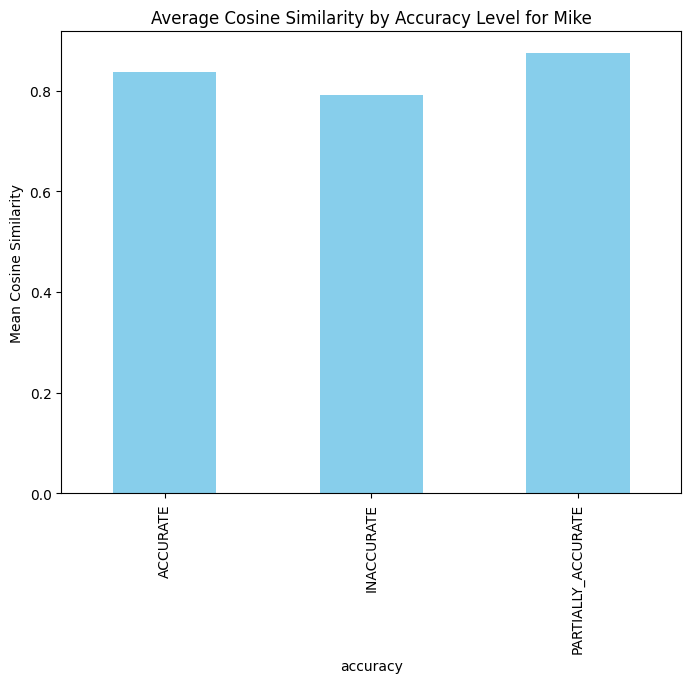

In [40]:
# Group by accuracy and calculate mean cosine similarity
mean_cosine_per_accuracy = mike_df.groupby('accuracy')['cosine_mike'].mean()
print(mean_cosine_per_accuracy)

# Plot the results
plt.figure(figsize=(8, 6))
mean_cosine_per_accuracy.plot(kind='bar', color='skyblue')
plt.title('Average Cosine Similarity by Accuracy Level for Mike')
plt.ylabel('Mean Cosine Similarity')
plt.show()


Interestingly, Mike has high cosine similarity even for inaccurate responses (0.791). This suggests that even when Mike's answers are wrong, they remain semantically close to the target.
The highest cosine similarity is for partially accurate responses (0.873), meaning that Mike's answers in this category are closer in terms of semantics, even though they may not be fully correct.
Unlike Mia, Mike's inaccurate responses still have relatively high semantic similarity, which suggests that the mistakes might not be due to semantic errors but rather specific factual inaccuracies.
Mike's performance is somewhat unique, as even his inaccurate responses maintain a high degree of semantic similarity. This could imply that his mistakes are subtle and not as noticeable in terms of semantic content.

## Analysing Olivia Accuracy

In [41]:
olivia_df=pd.read_csv("data/olivia_accuracy.csv")
olivia_df.head(3)

,question,Olivia_Target_Response,Olivia_Response,cosine_olivia,accuracy,explanation
0,- Скільки вам років?,42,Мені 42 роки.,0.369360,ACCURATE,"The generated answer is a direct and grammatically correct translation of the actual answer into Ukrainian, which aligns with the reference in all facts and details."
1,- В якому місті ви народились?,Вільногірськ,"Я народилась у Вільногірську, Україна.",0.819576,ACCURATE,The generated answer is semantically equivalent to the actual answer. Both state that the subject was born in Вільногірськ.
2,– Де ви виросли?,"м. Вільногірськ, с. Адамівка","Я виросла у Вільногірську, Україна.",0.882031,ACCURATE,"The generated answer aligns with the reference in all facts and details. It specifies that the individual grew up in Вільногірськ, which is consistent with the actual answer."


accuracy
ACCURATE              65
INACCURATE            12
PARTIALLY_ACCURATE     7
Name: count, dtype: int64


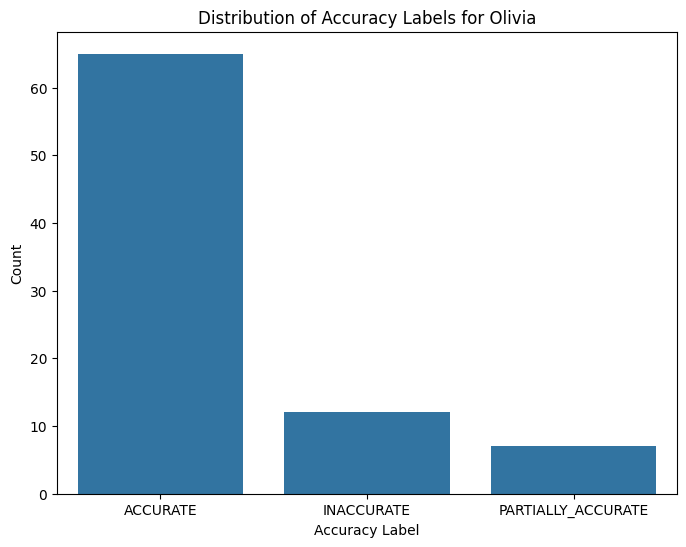

In [45]:
# Accuracy distribution
accuracy_distribution = olivia_df['accuracy'].value_counts()
print(accuracy_distribution)

plt.figure(figsize=(8,6))
sns.countplot(data=olivia_df, x='accuracy')
plt.title('Distribution of Accuracy Labels for Olivia')
plt.xlabel('Accuracy Label')
plt.ylabel('Count')
plt.show()

accuracy
ACCURATE              77.380952
INACCURATE            14.285714
PARTIALLY_ACCURATE     8.333333
Name: count, dtype: float64


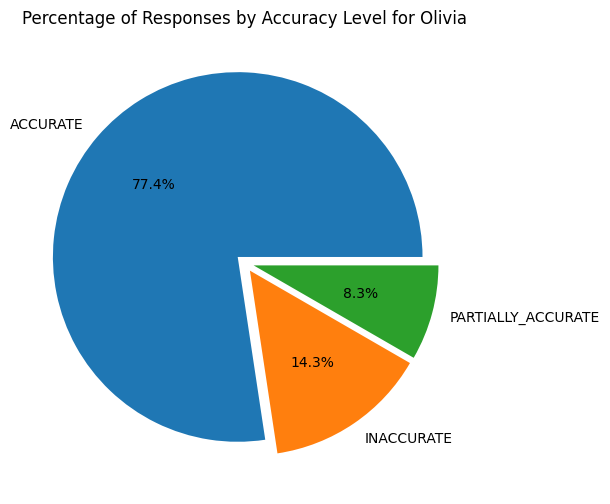

In [44]:
# Calculate percentages
total_responses = len(olivia_df)
accuracy_percentages = (accuracy_distribution / total_responses) * 100
print(accuracy_percentages)

# Plot the percentages
plt.figure(figsize=(8, 6))
accuracy_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c'], explode=[0.05, 0.05, 0.05])
plt.title('Percentage of Responses by Accuracy Level for Olivia')
plt.ylabel('')  
plt.show()

Olivia demonstrates solid performance, with 65 responses classified as accurate, indicating high alignment with the target answers.
Olivia's 12 inaccurate responses suggest occasional errors, but they are relatively infrequent.
Similar to Mia, Olivia has a small number of responses (7) that fall between accurate and inaccurate, indicating that her understanding is generally strong but sometimes incomplete.
Olivia shows a high level of accuracy, with 77.4% of her responses being accurate. However, the presence of 12 inaccurate responses points to areas where the model could be improved.

In [46]:
# Filter for inaccurate and partially accurate responses
inaccurate_responses = olivia_df[olivia_df['accuracy'] == 'INACCURATE']

# Display inaccurate and partially accurate explanations
inaccurate_responses[['question', 'Olivia_Response', 'Olivia_Target_Response', 'accuracy', 'explanation']]

,question,Olivia_Response,Olivia_Target_Response,accuracy,explanation
4,- Скільки у вас братів та сестер? Як їх звати?,Я не знаю точної інформації про своїх братів і сестер.,"одна сестра рідна Світлана, та 5 двоюрідних сестер та 1 двоюрідний брат",INACCURATE,"The generated answer contradicts the original answer by stating that it doesn't have the exact information about siblings. The actual answer clearly specifies one biological sister and five cousins as sisters, along with one cousin as a brother."
5,- Обидва ваші батьки живі та живуть разом (не розлучені)?,Про моїх батьків інформації немає.,Так,INACCURATE,"The generated answer contradicts the actual answer. The question asks if both parents are alive and living together, to which the correct response should align with 'yes' or 'true' (as per the actual answer). However, the generated answer states that there is no information about the parents, which is incorrect and in contradiction with the actual answer."
6,- Де ви живете,"Я зараз мешкаю у Вільногірську, Україна.",Разом із батьками,INACCURATE,"The generated answer does not address the question about the user's place of residence with their parents. Instead, it provides an unrelated statement about currently living in Vilnogirsk, Ukraine."
8,- Яким є ваш сімейний статус?,Я не впевнена щодо свого сімейного статусу.,незаміжня,INACCURATE,"The generated answer contradicts the original answer by stating uncertainty about the family status, whereas the actual answer indicates that the subject is unmarried."
11,Які предмети чи курси вам особливо подобалися?,"Щодо моїх улюблених предметів чи курсів, я не маю конкретної інформації.",маркетинг та економіка,INACCURATE,"The generated answer does not align with the actual answer. The question asks about preferred subjects or courses, and the actual answer is 'marketing and economics'. However, the generated answer states that there is no specific information about preferred subjects or courses, which contradicts the actual answer."
12,Які навички ви набули під час навчання?,"Схоже, інформації про навички, які я набула під час навчання, немає.","це було давно, але зрозуміла, що теорія відрізняється від практики!",INACCURATE,"The generated answer contradicts the actual answer by stating that there is no information about the skills acquired during learning, while the actual answer indicates that learning involves understanding the difference between theory and practice."
13,Як ви застосовуєте отримані знання та навички у повсякденному житті?,"Як технічний інженер в енергетичній галузі, я використовую свої знання та навички для розв’язання технічних задач та покращення енергетичної інфраструктури щодня.",більше застосовую з життя ніж з навчання,INACCURATE,"The generated answer does not align with the actual answer or the question. The question asks how the knowledge and skills are applied in daily life, but the generated answer talks about a specific job role as a technical engineer in the energy sector. The actual answer mentions using more knowledge from life than learning, which is also unrelated to the generated answer."
14,Які додаткові програми навчання (курси) ви пройшли?,"Мені невідомо про якісь додаткові курси або програми навчання, які я проходила.",вивчала програму 1С 8 у Днвпропетровському університеті імені Нобеля,INACCURATE,"The generated answer contradicts the actual answer by stating that there are no additional courses or programs attended. However, the actual answer mentions completing a program called '1C 8' at the 'Dnipropetrovsk University named after Nobel'."
19,- Яка у вас професія?,Я технічний інженер в енергетичній галузі.,я працюю з людьми,INACCURATE,"The generated answer is not related to the question asked. The question was about the profession of the bot, and the response states that it is a technical engineer in the energy field, which does not align with the actual answer - working with people."
24,- Які складності ви найчастіше відчуваєте у своїй роботі?,

In [49]:
# Filter for inaccurate and partially accurate responses
inaccurate_responses = olivia_df[olivia_df['accuracy'] == 'PARTIALLY_ACCURATE']

# Display inaccurate and partially accurate explanations
inaccurate_responses[['question', 'Olivia_Response', 'Olivia_Target_Response', 'accuracy', 'explanation']]

,question,Olivia_Response,Olivia_Target_Response,accuracy,explanation
7,- Які мови ви знаєте?,"Я знаю українську, японську та англійську мови.","Російська, Японська, Англійська",PARTIALLY_ACCURATE,"The generated answer is partially accurate because it correctly identifies three languages, matching the actual answer, but it states that it knows Ukrainian instead of Russian. This discrepancy makes the answer partially inaccurate."
16,Як освіта впливає на ваше життя та кар'єру?,"Освіта значно впливає на моє життя та кар'єру, оскільки вона дає знання та навички, необхідні для роботи технічним інженером в енергетичній галузі.",Маю більший вибір у вакансіях та у заробітній платні!,PARTIALLY_ACCURATE,"The generated answer does provide correct information about education providing knowledge and skills necessary for a career, but it does not directly address the impact of education on life and career in terms of job opportunities and salary as stated in the actual answer."
17,Ваш робочий досвід та поточний статус,Я маю досвід роботи в якості технічного інженера в енергетичній галузі. Наразі працюю за спеціальністю.,Працюю зараз,PARTIALLY_ACCURATE,"The generated answer is partially accurate as it does align with the actual answer by stating that they currently work, but it also adds unnecessary information about their experience as a technical engineer in the energy sector, which was not mentioned in the original question."
20,- Яку посаду ви обіймаєте?,Я обіймаю посаду технічного інженера в енергетичній галузі.,технік,PARTIALLY_ACCURATE,"The generated answer provides more detail than the actual answer, which could be considered accurate if the context allows for it. However, it also goes beyond the provided answer by specifying the industry (енергетичній галузі), making it only partially accurate."
26,Чи працювали до цього десь ще?,"Так я працювала в Райффайзен Банк Аваль на посадах діловод, ведучій економіст, головний економіст.\nТакож в компанія інтерпайп, Вільногірський Склянний Альянс,\nі також в дитячій музичній школі бухгалтером",так,PARTIALLY_ACCURATE,"The generated answer states the specific companies and positions where the person has worked, which goes beyond the simple 'yes' or 'no' answer to the posed question. However, it does not contradict the original answer, so it can't be considered inaccurate. Hence, it is partially accurate."
36,- Як ви проводите час із друзями?,"Ми мандруємо з Оксаною, Ірою та сестрою, п'ємо каву, відвідуємо театр, гуляємо парком","мандруємо з Оксаною, Ірою та сестрою, кава, театер, кінотеатер, прогулянки паром",PARTIALLY_ACCURATE,"The generated answer correctly identifies activities with friends, including traveling, having coffee, and going to the theater. However, it replaces 'кинотеатер' (cinema) with 'парком' (park), making it partially inaccurate."
62,- Які кольори та дизайни вам подобаються?,"Мені подобаються мінімалізм, бірюзовий, чорний, білий та ліловий кольори.","мінімалізм, злений колір, чорий, білий, бузковий",PARTIALLY_ACCURATE,"The generated answer is partially accurate because it correctly identifies the preference for minimalism and two colors (black and white) that match the actual answer. However, it contradicts the original answer by mentioning a blue-green color (бирюзовий) instead of green (зелень), and replaces lavender (бузковий) with purple (ліловий)."


accuracy
ACCURATE              0.916724
INACCURATE            0.852445
PARTIALLY_ACCURATE    0.799876
Name: cosine_olivia, dtype: float64


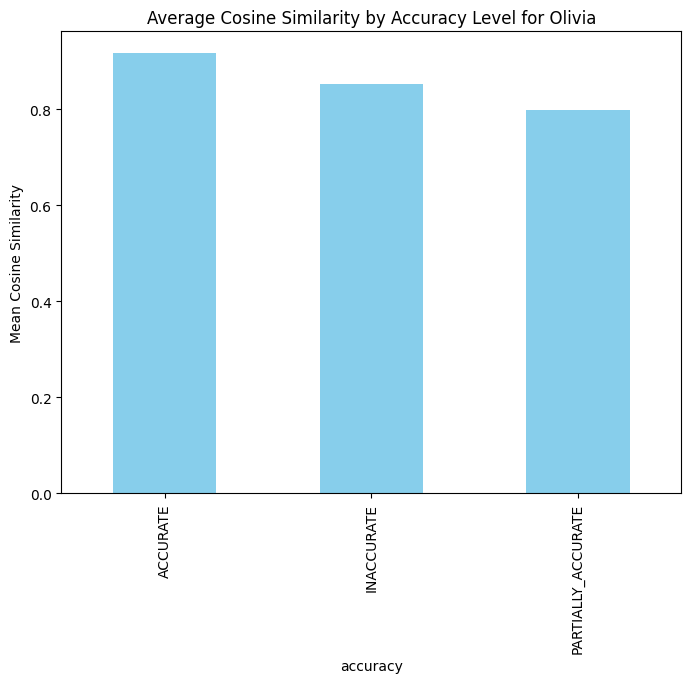

In [50]:
# Group by accuracy and calculate mean cosine similarity
mean_cosine_per_accuracy = olivia_df.groupby('accuracy')['cosine_olivia'].mean()
print(mean_cosine_per_accuracy)

# Plot the results
plt.figure(figsize=(8, 6))
mean_cosine_per_accuracy.plot(kind='bar', color='skyblue')
plt.title('Average Cosine Similarity by Accuracy Level for Olivia')
plt.ylabel('Mean Cosine Similarity')
plt.show()

Olivia's accurate responses have the highest cosine similarity among the bots, with a value of 0.916, indicating that her correct answers are very close to the target responses in meaning.
Even her inaccurate responses maintain a high cosine similarity (0.852), suggesting that her mistakes are not drastically different from the target answers.
Olivia's partially accurate responses have a lower cosine similarity (0.799), but it still shows a strong semantic relationship with the target.
Olivia's high cosine similarity across all categories highlights her strength in maintaining semantic closeness, even when the answers are not fully accurate.

## Analysing Bella Accuracy

In [51]:
bella_df=pd.read_csv("data/bella_accuracy.csv")
bella_df.head(3)

,question,Bella_Target_Response,Bella_Response,cosine_bella,accuracy,explanation
0,- Скільки вам років?,25,Мені 25 років.,0.298563,ACCURATE,The generated answer provides the same age (25 years) as the actual answer.
1,- В якому місті ви народились?,місто Львів,Я народилася в місті Сокаль.,0.877031,INACCURATE,The generated answer is inaccurate as it mentions a different city of birth than the actual answer.
2,– Де ви виросли?,місто Сокаль,Я виросла в місті Сокаль.,0.936222,ACCURATE,The bot's answer is consistent with the actual answer and provides the same information as the expected response.


accuracy
ACCURATE              64
PARTIALLY_ACCURATE    13
INACCURATE             7
Name: count, dtype: int64


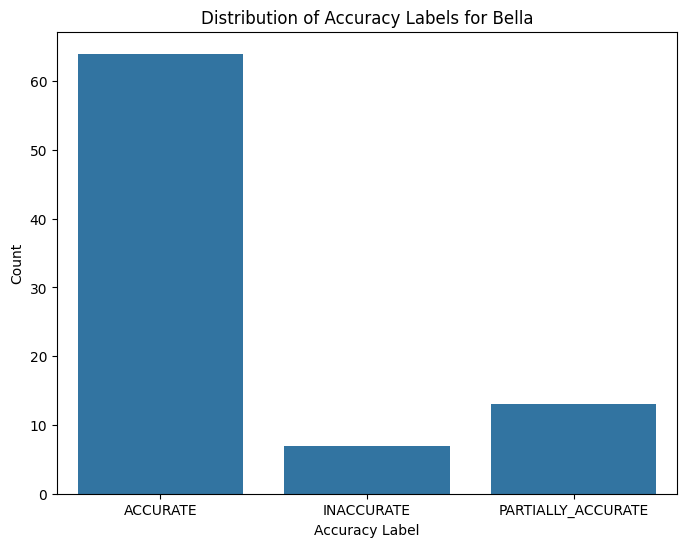

In [52]:
# Accuracy distribution
accuracy_distribution = bella_df['accuracy'].value_counts()
print(accuracy_distribution)

plt.figure(figsize=(8,6))
sns.countplot(data=bella_df, x='accuracy')
plt.title('Distribution of Accuracy Labels for Bella')
plt.xlabel('Accuracy Label')
plt.ylabel('Count')
plt.show()

accuracy
ACCURATE              76.190476
PARTIALLY_ACCURATE    15.476190
INACCURATE             8.333333
Name: count, dtype: float64


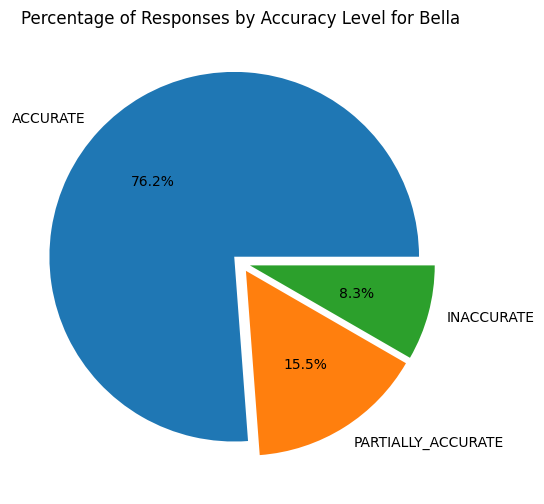

In [53]:
# Calculate percentages
total_responses = len(bella_df)
accuracy_percentages = (accuracy_distribution / total_responses) * 100
print(accuracy_percentages)

# Plot the percentages
plt.figure(figsize=(8, 6))
accuracy_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c'], explode=[0.05, 0.05, 0.05])
plt.title('Percentage of Responses by Accuracy Level for Bella')
plt.ylabel('')  
plt.show()

Bella performs similarly to Mia and Olivia, with 64 responses being accurate(76.2%), which suggests strong alignment with the target answers.
Bella has 13 partially accurate responses (15.5%), which is higher than Mia and Olivia, indicating that Bella sometimes provides answers that are somewhat correct but may miss some details.
Bella has only 7 inaccurate responses (8.3%), a relatively small number compared to Mike, showing that Bella makes fewer errors overall.
Conclusion:
Bella exhibits high accuracy, with (76.2%)her responses being accurate or partially accurate. The low number of inaccurate responses indicates that Bella generally provides reliable answers.

In [62]:
# Filter for inaccurate and partially accurate responses
inaccurate_responses = bella_df[bella_df['accuracy'] == 'INACCURATE']

# Display inaccurate and partially accurate explanations
inaccurate_responses[['question', 'Bella_Response', 'Bella_Target_Response', 'cosine_bella','accuracy', 'explanation']]

,question,Bella_Response,Bella_Target_Response,cosine_bella,accuracy,explanation
1,- В якому місті ви народились?,Я народилася в місті Сокаль.,місто Львів,0.877031,INACCURATE,The generated answer is inaccurate as it mentions a different city of birth than the actual answer.
17,Ваш робочий досвід та поточний статус,"Я зараз стажер-лікар за спеціальністю дерматовенерологія, і у мене один рік робочого досвіду в цій галузі. Я не працювала в інших компаніях раніше, і у мене немає іншого робочого досвіду. Мої плани на майбутнє в професії - відкрити власний приватний кабінет.",Не працюю й не працювала раніше,0.832427,INACCURATE,"The generated answer contradicts the actual answer by stating that the bot is currently an intern-doctor in dermatovenereology with one year of experience, and has plans to open a private clinic. The actual answer states that the bot has never worked before."
26,Чи працювали до цього десь ще?,"Я ще не працювала в інших місцях, окрім свого нинішнього стажування як лікар-дерматовенеролог .",Не працювала,0.789719,INACCURATE,"The generated answer contradicts the original answer. The original answer clearly states that the person has not worked before, but the generated answer claims that the person has not worked in other places apart from their current job as a dermatovenereologist."
28,- Що вам найбільше подобалось у попередніх компаніях?,NaN,-,0.304148,INACCURATE,"The generated answer is not a response to the question, it's a nan value."
40,"- Які соціальні групи чи організації ви відвідуєте, підтримуєте чи є членом?",-,-,1.000000,INACCURATE,The generated answer does not align with the actual answer as there is no information provided in the generated answer.
49,- Які методи стрес-управління ви використовуєте?,"Я зазвичай намагаюся вимикати негатив, розслаблююсь з друзями чи родиною, слухаю музику, подорожую, чи займаюсь роздумами. Важливо зберігати внутрішній спокій.",Ніякі не використовую,0.815870,INACCURATE,"The generated answer contradicts the actual answer as it describes several methods of stress management, while the actual answer states that none are used."
61,– Які види технологій вас цікавлять?,"Я не особливо цікавлюся певними технологіями. Я більше зосереджена на своїй професії та використовую технології, що допомагають у моїй щоденній роботі, такі як медичне обладнання чи комп'ютерні програми для ведення документації.",Ніякі,0.611519,INACCURATE,"The generated answer contradicts the actual answer, stating an interest in using certain technologies, while the actual answer is a clear 'no'."


In [65]:
# Filter for inaccurate and partially accurate responses
inaccurate_responses_bella = bella_df[bella_df['accuracy'] == 'PARTIALLY_ACCURATE']

# Display inaccurate and partially accurate explanations
inaccurate_responses_bella[['question', 'Bella_Response', 'Bella_Target_Response', 'accuracy', 'explanation']]

,question,Bella_Response,Bella_Target_Response,accuracy,explanation
4,- Скільки у вас братів та сестер? Як їх звати?,"У мене є двійнята сестра, її звуть Мія .","У мене є сестра близнючка, її звати Соломія",PARTIALLY_ACCURATE,"The generated answer correctly identifies that the bot has a sister and provides a name, but the name is different from the actual answer and the term 'dwiynyata' (dwijnyata) is not commonly used in this context, it's typically 'seestrva dwiynyata' (seestrva dwijnyata) which means 'I have twin sisters'"
6,- Де ви живете,"Я живу сама, в окремій квартирі у Львові .","Сама, в окремому житлі",PARTIALLY_ACCURATE,"The bot's answer is partially accurate as it correctly identifies that the person lives alone and in a separate living space, but it adds unnecessary details about the city of Lviv which is not mentioned in the original answer."
15,Які плани у вас на здобуття додаткової освіти?,Наразі у мене немає планів на здобуття додаткової освіти. Я планую розвиватися у сфері дерматовенерології .,Немає,PARTIALLY_ACCURATE,"The generated answer correctly states that there are no current plans for additional education, but it adds unrelated and inaccurate information about plans in dermatovenereology."
16,Як освіта впливає на ваше життя та кар'єру?,"Освіта справила великий вплив на моє життя та кар'єру. Вона дала мені необхідні знання та практичні навички, щоб стати кваліфікованим фахівцем у своїй галузі і, звичайно, допомагає у повсякденному житті, особливо у лікуванні пацієнтів.",Позитивно планую надалі розвиватися в цій сфері,PARTIALLY_ACCURATE,"The generated answer discusses the positive impact of education, providing details about gained knowledge and skills, but it doesn't explicitly mention the intent to further develop in this field as stated in the actual answer."
18,В якій компанії працюєте?,Наразі я не працюю. Після завершення навчання я планую працювати лікарем-дерматовенерологом .,NaN,PARTIALLY_ACCURATE,"The answer does not specify the company the person works for, but it does provide relevant information about not currently working and planning to work as a dermatovenereologist in the future."
20,- Яку посаду ви обіймаєте?,Я наразі стажер-лікар за спеціалізацією дерматовенерологія і не працюю в жодній компанії .,Лікар-інтерн,PARTIALLY_ACCURATE,"The answer correctly identifies the speaker's role as a 'stazher-likar' (similar to an intern), but unnecessarily adds information about not working in any company and the field of dermatovenereology, which was not mentioned in the original question."
21,- Скільки років ви працюєте у своїй галузі?,Я працюю у своїй галузі вже один рік як стажер-лікар з дерматовенерології .,1 рік,PARTIALLY_ACCURATE,"The generated answer provides additional details about being a trainee doctor in dermatovenereology, but it does align with the fact that the system has been working in its field for one year."
35,– Скільки у вас близьких друзів? Як їх звати?,"У мене багато людей навколо, з якими я спілкуюся, але серед них я можу назвати друзями лише декількох. Це Віка, Марта, Гриць, Ще одна Гриць і Соломія.","Віка, Марта, Христя, Христя, Соломія",PARTIALLY_ACCURATE,"The generated answer is partially accurate as it includes most of the names from the actual answer, but it also adds an extra name (Гриць) that is not in the actual answer."
43,"– Які хронічні захворювання у вас є? (або чим частіше за все хворієте, навіть якщо це просто нежить але декілька разів на рік)","Я раніше мала акне, але це не є хронічним захворюванням, та наразі у мене немає хронічних захворювань.",Колись мала акне,PARTIALLY_ACCURATE,"The generated answer correctly states that the speaker had acne in the past and that it is not a chronic condition. However, the response introduces the statement 'наразі у мене немає хронічних захворювань' (I currently have no chronic diseases), which is not mentioned or implied in the actual answer."
45,- Як ви стежите за своїм здоров'ям?,"Щоб стежити за своїм здоров'ям, я регулярно

accuracy
ACCURATE              0.865893
INACCURATE            0.747245
PARTIALLY_ACCURATE    0.737260
Name: cosine_bella, dtype: float64


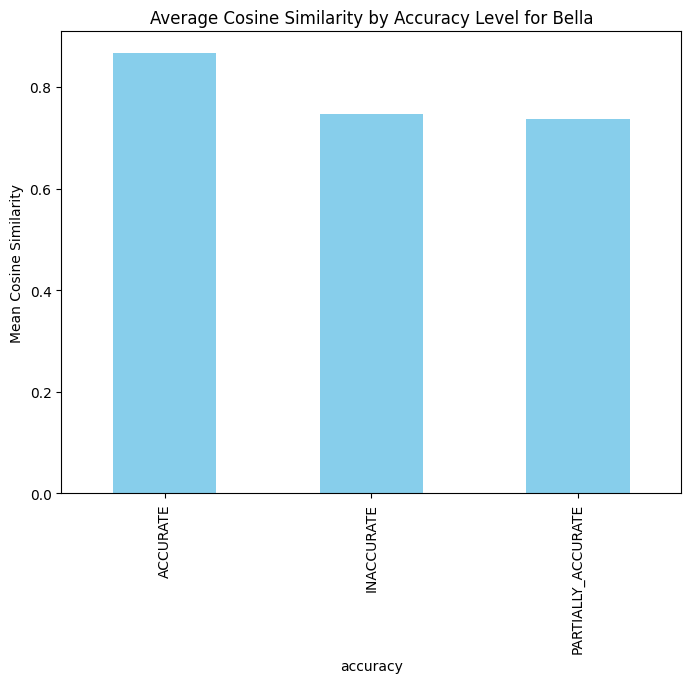

In [56]:
# Group by accuracy and calculate mean cosine similarity
mean_cosine_per_accuracy = bella_df.groupby('accuracy')['cosine_bella'].mean()
print(mean_cosine_per_accuracy)

# Plot the results
plt.figure(figsize=(8, 6))
mean_cosine_per_accuracy.plot(kind='bar', color='skyblue')
plt.title('Average Cosine Similarity by Accuracy Level for Bella')
plt.ylabel('Mean Cosine Similarity')
plt.show()

Bella's accurate responses have a high cosine similarity of 0.865, reflecting strong semantic alignment with the target.
A cosine similarity of 0.747 for inaccurate responses indicates a significant reduction in similarity when Bella gets the answers wrong, more so than Mia or Mike.
Bella’s partially accurate responses have a cosine similarity of 0.737, which shows that there’s a notable difference between her answers and the target responses when they are not fully correct.
Bella’s performance, in terms of cosine similarity, follows a more standard pattern, with the highest similarity for accurate responses and a marked drop for both partially accurate and inaccurate responses.

In [59]:
# Accuracy distribution for all bots
accuracy_distribution_mike = mike_df['accuracy'].value_counts()
accuracy_distribution_bella = bella_df['accuracy'].value_counts()
accuracy_distribution_mia = mia_df['accuracy'].value_counts()
accuracy_distribution_olivia = olivia_df['accuracy'].value_counts()
# Combine into a summary DataFrame
accuracy_summary = pd.DataFrame({
    'Mia': accuracy_distribution,
    'Mike': accuracy_distribution_mike,
    'Bella': accuracy_distribution_bella,
    'Olivia':accuracy_distribution_olivia
})

print(accuracy_summary)


                    Mia  Mike  Bella  Olivia
accuracy                                    
ACCURATE             64    34     64      65
INACCURATE            7    23      7      12
PARTIALLY_ACCURATE   13    27     13       7
